In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectKBest, SelectFdr, f_classif, mutual_info_classif, chi2, RFECV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, Normalizer, LabelBinarizer, OneHotEncoder,OrdinalEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score, f1_score, precision_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso, RidgeClassifier, LogisticRegression
from imblearn.over_sampling import SMOTE, RandomOverSampler
from xgboost import XGBClassifier, plot_importance
import lightgbm as lgbm
%matplotlib inline
sns.set(color_codes = True, style = 'ticks', palette = 'Set2')
pd.options.display.max_columns = 1000

/anaconda3/envs/FTDS/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
os.listdir()

['.DS_Store',
 'weather-dataset-rattle-package.zip',
 'Project 2_basic_ver.ipynb',
 'weatherAUS.csv',
 'WeatherUpdated.csv',
 'Project 2.ipynb',
 '.ipynb_checkpoints']

In [3]:
weather = pd.read_csv('weatherAUS.csv')

In [5]:
weather.shape

(142193, 24)

In [6]:
weather.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [7]:
weather['RainTomorrow'] = LabelEncoder().fit_transform(weather['RainTomorrow'])

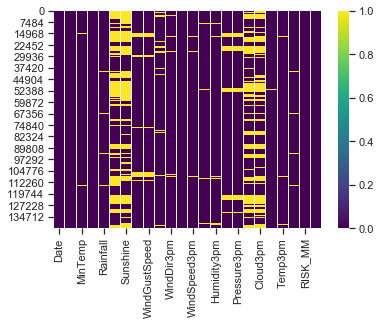

In [8]:
sns.heatmap(data= weather.isna(), cmap = 'viridis')

In [9]:
#drop nan value in RainToday
weather = weather[~weather.RainToday.isna()]
display(weather.head())
weather.shape

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,0


(140787, 24)

In [11]:
# weather = create_RainYesturady(weather)
RainYesturady = np.array(weather['RainToday'])
RainYesturady = np.insert(RainYesturady,0,3)
RainYesturady = np.delete(RainYesturady,-1)

In [12]:
weather.insert((len(weather.columns)-1),'RainYesturady', RainYesturady)

In [13]:
weather.drop(index=0, inplace = True)

In [14]:
RainYesturady.shape

(140787,)

In [15]:
display(weather.head(10))
weather.shape

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainYesturady,RainTomorrow
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,0
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No,0
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No,0
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No,0
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,No,1
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No,0
10,2008-12-11,Albury,13.4,30.4,0.0,NaN,NaN,N,30.0,SSE,ESE,17.0,6.0,48.0,22.0,1011.8,1008.7,NaN,NaN,20.4,28.8,No,2.2,Yes,1


(140786, 25)

# Feature Selection

In [25]:
weather_for_selection = weather.drop(['RISK_MM'], axis = 1)

In [26]:
weather_for_selection.shape

(140786, 24)

In [27]:
#change date to month
weather_for_selection['Date'] = weather_for_selection['Date'].astype('datetime64')
weather_for_selection['Date'] = weather_for_selection['Date'].dt.month
weather_for_selection.rename(columns = {'Date':'Month'}, inplace = True)

In [28]:
remove_all_nan = weather_for_selection[~weather_for_selection.isna()]

In [29]:
#split features into two lists based on their datatype
def split_col(dataframe):
    categorical_features = []
    numerical_features = []
    for i in dataframe.columns.values:
        if dataframe[i].dtypes != 'object':
            numerical_features.append(i)
        else:
            categorical_features.append(i)
    return categorical_features, numerical_features

In [30]:
display(weather_for_selection.head())
category_f, numerical_f = split_col(remove_all_nan.iloc[:,:-1])

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainYesturady,RainTomorrow
1,12,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0
2,12,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0
3,12,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,0
4,12,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0
5,12,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No,0


### Look at the replationship between each feature and the target variable

In [31]:
def selection_catergory(category_f):
    result = []
    for i in np.arange(len(category_f)):
        x = remove_all_nan[~remove_all_nan[category_f[i]].isna()]
        feature = LabelEncoder().fit_transform(x[category_f[i]])
        label = x['RainTomorrow']
        fstat, pval = chi2(feature.reshape(-1,1), label)
        mi = mutual_info_classif(feature.reshape(-1,1), label)
        result.append([category_f[i], round(fstat[0],5), round(pval[0],5), round(mi[0],5)])
    return pd.DataFrame(result, columns =['Category_f', 'Chi2', 'Pval', 'MI'])

def selection_number(numerical_f):
    result = []
    for i in np.arange(len(numerical_f)):
        x = remove_all_nan[~remove_all_nan[numerical_f[i]].isna()]
        feature = StandardScaler().fit_transform(x[[numerical_f[i]]])
        label = x['RainTomorrow']
        fstat, pval = f_classif(feature.reshape(-1,1), label)
        mi = mutual_info_classif(feature.reshape(-1,1), label)
        result.append([numerical_f[i], round(fstat[0],5), round(pval[0],5), round(mi[0],5)])
    return pd.DataFrame(result, columns =['Number_f', 'Fstat', 'Pval', 'MI'])

In [32]:
result1 = selection_catergory(category_f)
result2 = selection_number(numerical_f)
display(result1)
display(result2)

,Category_f,Chi2,Pval,MI
0,Location,33.52780,0.0,0.01455
1,WindGustDir,920.22286,0.0,0.00676
2,WindDir9am,383.52921,0.0,0.00907
3,WindDir3pm,324.81925,0.0,0.00630
4,RainToday,10717.57554,0.0,0.04337
5,RainYesturady,2391.01837,0.0,0.00912


,Number_f,Fstat,Pval,MI
0,Month,7.29448,0.00692,0.00293
1,MinTemp,1004.84990,0.00000,0.00532
2,MaxTemp,3662.61380,0.00000,0.01475
3,Rainfall,8531.27144,0.00000,0.05850
4,Evaporation,1167.46923,0.00000,0.01196
5,Sunshine,18976.15330,0.00000,0.11192
6,WindGustSpeed,7647.64315,0.00000,0.02728
7,WindSpeed9am,1136.09843,0.00000,0.00509
8,WindSpeed3pm,1048.67875,0.00000,0.00558
9,Humidity9am,9908.80656,0.00000,0.03838


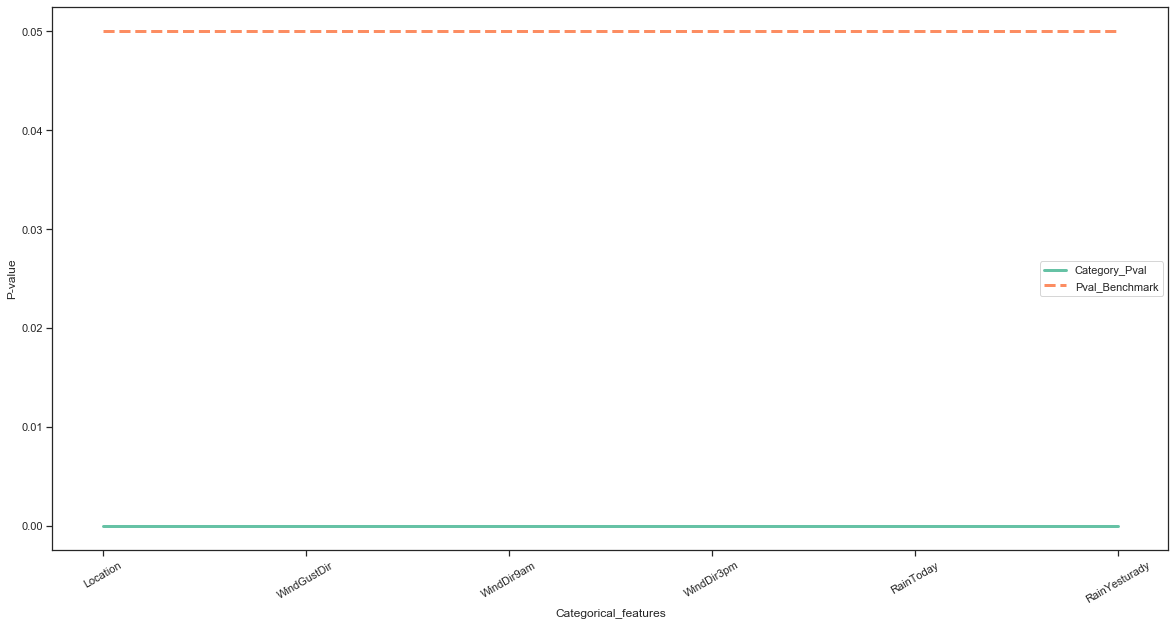

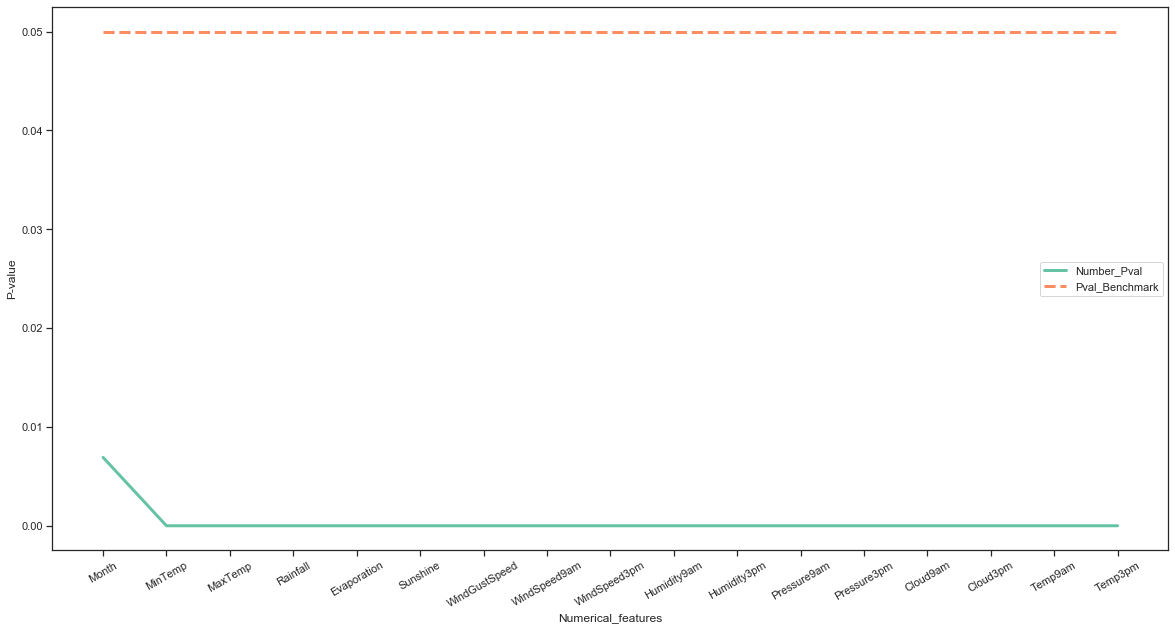

In [133]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111)
ax.plot(result1['Category_f'], result1['Pval'], label = 'Category_Pval', linewidth = 3)
ax.plot(result1['Category_f'], [0.05]*6, linestyle = '--', label = 'Pval_Benchmark', linewidth = 3)
plt.tick_params(axis = 'x',rotation = 30)
plt.xlabel('Categorical_features')
plt.ylabel('P-value')
plt.legend()

fig2 = plt.figure(figsize = (20,10))
ax2 = fig2.add_subplot(111)
ax2.plot(result2['Number_f'], result2['Pval'],label = 'Number_Pval', linewidth = 3)
ax2.plot(result2['Number_f'], [0.05]*len(result2['Number_f']), linestyle = '--', label = 'Pval_Benchmark', linewidth = 3)
plt.tick_params(axis = 'x',rotation = 30)
plt.xlabel('Numerical_features')
plt.ylabel('P-value')
plt.legend()

#### Conclusion: Drop 'Month' which has relatively higher value, although its p-value is less than 0.05

In [34]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

# First Trial: Remove all rows with nan values

In [609]:
display(weather_for_selection.head())
weather_first_trial = weather_for_selection.dropna()
weather_first_trial.drop(['Month'], axis = 1, inplace = True)
display(weather_first_trial.head())
weather_first_trial.shape

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainYesturady,RainTomorrow
1,12,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0
2,12,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0
3,12,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,0
4,12,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0
5,12,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No,0


/anaconda3/envs/FTDS/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainYesturady,RainTomorrow
5939,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No,0
5940,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No,0
5942,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No,0
5943,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No,0
5944,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No,0


(56420, 23)

In [610]:
result2['Number_f'].values[1:]

array(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm'], dtype=object)

In [611]:
x_train, x_test, y_train, y_test = train_test_split(weather_first_trial.iloc[:,:-1], weather_first_trial.iloc[:,-1]
                                                    , test_size = 0.2, random_state = 300)

col = ColumnTransformer(transformers=[('standardized', StandardScaler(), result2['Number_f'].values[1:])],remainder = 'passthrough', 
                       sparse_threshold = 0)

x_test1 = x_test.copy()
y_test1 = y_test.copy()
#Resampling
x_train = pd.get_dummies(x_train, drop_first = True)
x_test = pd.get_dummies(x_test, drop_first = True)
x_train_columns = x_train.columns.values
x_train = col.fit_transform(x_train)
x_test = col.transform(x_test)
x_train, y_train = SMOTE(sampling_strategy='minority').fit_resample(x_train, y_train)
# neg_pos = 35220.0/9916.0

#models
logisticR = LogisticRegression(penalty = 'l2', solver = 'newton-cg', multi_class = 'multinomial',random_state = 300)
randomF = RandomForestClassifier(random_state=300)
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth = 1),n_estimators=50, random_state=300)
xgboost = XGBClassifier(random_state=300)


In [612]:
x_train_columns

array(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Brisbane',
       'Location_Cairns', 'Location_Canberra', 'Location_Cobar',
       'Location_CoffsHarbour', 'Location_Darwin', 'Location_Hobart',
       'Location_Melbourne', 'Location_MelbourneAirport',
       'Location_Mildura', 'Location_Moree', 'Location_MountGambier',
       'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_Perth',
       'Location_PerthAirport', 'Location_Portland', 'Location_Sale',
       'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville',
       'Location_WaggaWagga', 'Location_Watsonia', 'Location_Williamtown',
       'Location_Woomera', 'WindGustDir_ENE', 'WindGustDir_ESE',
       'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE',
       'WindGustDir_NNW', 'WindGustDir_NW', 'WindGust

In [613]:
%%time

def check_model(models, models_name):
    result_positive = []
    for model in range(len(models)):
        print(f'Processing: {models_names[model]}')
        pipeline1 = Pipeline(steps=[('model', models[model])])
        pipeline1.fit(x_train, y_train)
        y_predicted = pipeline1.predict(x_test)
        f1score = f1_score(y_test, y_predicted,average = None)[1]
        result_positive.append([models_names[model], round(f1score,4)])
    return pd.DataFrame(result_positive, columns = ['Model_Name', 'f1_Score_Positive'])

CPU times: user 11 µs, sys: 1e+03 ns, total: 12 µs
Wall time: 17.9 µs


### Compare 4 models' performance

In [614]:
%%time
models = [logisticR, randomF, adaboost, xgboost]
models_names = ['logisticR', 'randomF', 'adaboost', 'xgboost']
result_positive = check_model(models, models_names)
result_positive

Processing: logisticR
Processing: randomF


/anaconda3/envs/FTDS/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Processing: adaboost
Processing: xgboost
CPU times: user 1min 2s, sys: 1.28 s, total: 1min 3s
Wall time: 52 s


,Model_Name,f1_Score_Positive
0,logisticR,0.6493
1,randomF,0.6206
2,adaboost,0.6306
3,xgboost,0.6606


Text(0.5, 1.0, 'Model Selection')

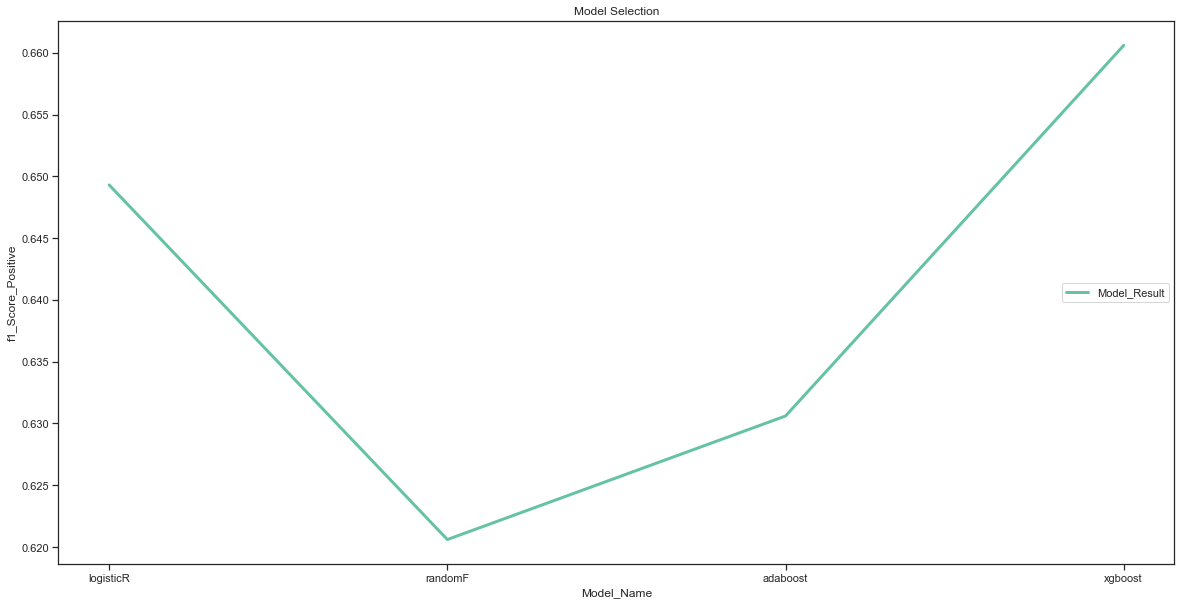

In [615]:
plt.figure(figsize = (20,10))
plt.plot(result_positive['Model_Name'], result_positive['f1_Score_Positive'], label = 'Model_Result', linewidth = 3)
plt.legend(loc =5)
plt.xlabel('Model_Name')
plt.ylabel('f1_Score_Positive')
plt.title('Model Selection')

## Final Model

In [616]:
weather_first_trial['RainTomorrow'].value_counts()

0    43993
1    12427
Name: RainTomorrow, dtype: int64

In [617]:
# neg_pos = 35220.0/9916.0
xgboost1 = XGBClassifier(n_estimators=300,random_state=300, max_depth = 5, cv = 3)
xgboost1.fit(x_train, y_train)
y_predicted = xgboost1.predict(x_test)

print(classification_report(y_test, y_predicted, target_names=['No', 'Yes']))

print(f1_score(y_test, y_predicted,average = None)[1])
cvs = cross_val_score(estimator=xgboost1, X=x_train, y = y_train,cv = 10, verbose=2,scoring='accuracy')
print(f'10-fold Cross Validation: {cvs.mean()}')

              precision    recall  f1-score   support

          No       0.89      0.94      0.91      8773
         Yes       0.73      0.61      0.66      2511

    accuracy                           0.86     11284
   macro avg       0.81      0.77      0.79     11284
weighted avg       0.86      0.86      0.86     11284

0.6640522875816993
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total= 2.0min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.0min remaining:    0.0s


[CV] ................................................. , total= 2.0min
[CV]  ................................................................
[CV] ................................................. , total= 2.2min
[CV]  ................................................................
[CV] ................................................. , total= 2.2min
[CV]  ................................................................
[CV] ................................................. , total= 2.3min
[CV]  ................................................................
[CV] ................................................. , total= 2.0min
[CV]  ................................................................
[CV] ................................................. , total= 2.7min
[CV]  ................................................................
[CV] ................................................. , total= 2.2min
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 22.0min finished


Text(66.5, 0.5, 'Actual')

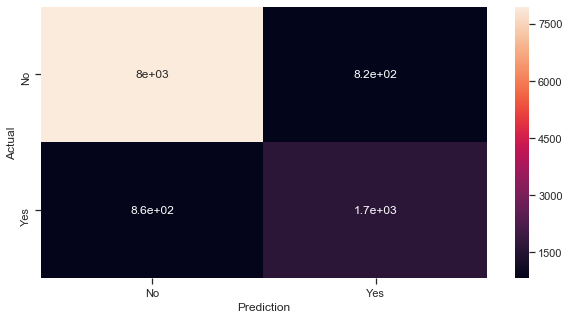

In [462]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)
plot_confusion =confusion_matrix(y_test, y_predicted)
sns.heatmap(plot_confusion, annot = True, xticklabels = ['No', 'Yes'], yticklabels = ['No', 'Yes'])
plt.xlabel('Prediction')
plt.ylabel('Actual')

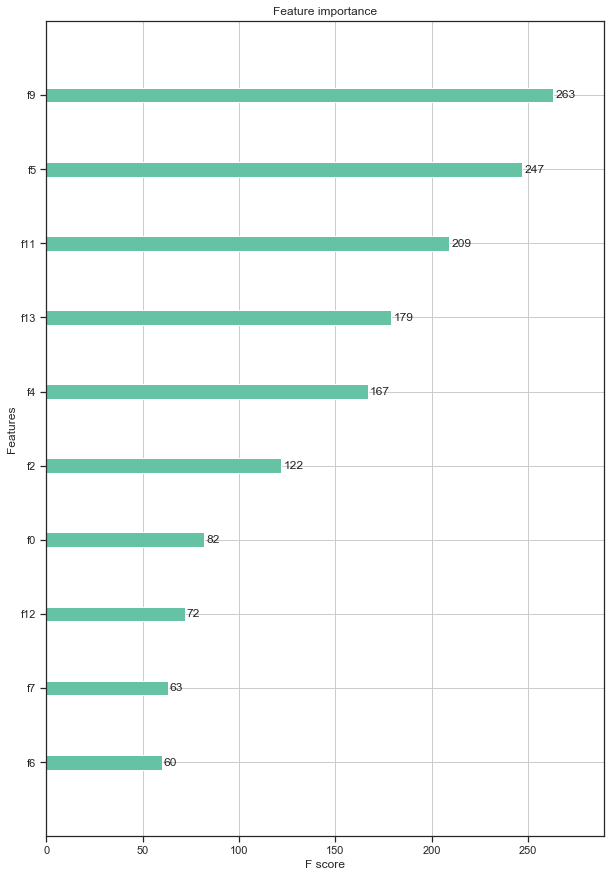

In [463]:
fig2 = plt.figure(figsize = (10,15))
ax = fig2.add_subplot(111)
plot_importance(xgboost1, max_num_features = 10, ax=ax)

In [495]:
features = weather_first_trial.columns[:-1]
print(list(features))
def prediction (data):
    data = pd.get_dummies(data, drop_first = True)
    data = col.fit_transform(data)
    print(xgboost1.predict(data))
    
Location = list(weather_first_trial['Location'].unique())
WindGustDir = list(weather_first_trial['WindGustDir'].unique())
WindDir9am = list(weather_first_trial['WindDir9am'].unique())
WindDir3pm = list(weather_first_trial['WindDir3pm'].unique())
print('------------------------')
print(f'Location:\n{Location}')
print('------------------------')
print(f'WindGustDir:\n{WindGustDir}')
print('------------------------')
print(f'WindDir9am:\n{WindDir9am}')
print('------------------------')
print(f'WindDir3pm:\n{WindDir3pm}')

# ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 
# 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 
# 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 
# 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainYesturady']
#input a list of all feature above to below function
prediction()

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainYesturady']
------------------------
Location:
['Cobar', 'CoffsHarbour', 'Moree', 'NorfolkIsland', 'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Canberra', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura', 'Portland', 'Watsonia', 'Brisbane', 'Cairns', 'Townsville', 'MountGambier', 'Nuriootpa', 'Woomera', 'PerthAirport', 'Perth', 'Hobart', 'AliceSprings', 'Darwin']
------------------------
WindGustDir:
['SSW', 'S', 'NNE', 'WNW', 'N', 'SE', 'ENE', 'NE', 'E', 'SW', 'W', 'WSW', 'NNW', 'ESE', 'SSE', 'NW']
------------------------
WindDir9am:
['ENE', 'SSE', 'NNE', 'WNW', 'NW', 'N', 'S', 'SE', 'NE', 'W', 'SSW', 'E', 'NNW', 'ESE', 'WSW', 'SW']
------------------------
WindDir3pm:
['SW', 'SSE', 'N

# Select the top 6 features (based on the feature importances above)

In [344]:
selection = x_train_columns[[9,5,11,13,4,2]]
# [9,5,11,13,4,2]
selection

array(['Humidity3pm', 'WindGustSpeed', 'Pressure3pm', 'Cloud3pm',
       'Sunshine', 'Rainfall'], dtype=object)

In [345]:
x_weather_selected = weather_first_trial[selection]
y_weather_selected = weather_first_trial.iloc[:,-1]
display(x_weather_selected.head())
display(y_weather_selected.head())

,Humidity3pm,WindGustSpeed,Pressure3pm,Cloud3pm,Sunshine,Rainfall
5939,13.0,48.0,1004.4,5.0,12.3,0.0
5940,8.0,37.0,1012.1,1.0,13.0,0.0
5942,22.0,46.0,1009.2,6.0,10.6,0.0
5943,22.0,31.0,1009.1,5.0,12.2,0.0
5944,15.0,35.0,1007.4,6.0,8.4,0.0


5939    0
5940    0
5942    0
5943    0
5944    0
Name: RainTomorrow, dtype: int64

In [437]:
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(x_weather_selected, y_weather_selected, 
                                                           test_size = 0.2, random_state = 200)
coltrans = ColumnTransformer(transformers = [('standard', StandardScaler(), selection)])
NegoverPos = y_train_s.value_counts()[0] / y_train_s.value_counts()[1]
x_train_s = coltrans.fit_transform(x_train_s)
x_test_s = coltrans.transform(x_test_s)

def determine_n_estimators(start = 100, end = 110, step = 1, **kwarg):
    result = []
    for i in range(start,end+1,step):
        xgboost2 = XGBClassifier(random_state=300,
                                 n_estimators=i,
                                 max_depth = 3,
                                 learning_rate=0.1, 
                                 min_child_weight = 1, 
                                 gamma = 0.2,
                                 subsample = 0.8,
                                 colsample_bytree= 0.8,
                                 objective= 'binary:logistic',
                                 scale_pos_weight = NegoverPos,
                                 n_jobs=-1)

        xgboost2.fit(x_train_s, y_train_s)
        y_predicted1 = xgboost2.predict(x_test_s)
        result.append([i,f1_score(y_test_s, y_predicted1,average = None)[1]])
    print(xgboost2.get_params)
    plotgraph = pd.DataFrame(result, columns = ['n_estimators', 'f1_score for +ve result'])
    sns.lineplot(data = plotgraph, x = 'n_estimators', y = 'f1_score for +ve result')
    plt.title(f'n_estimators from {start} to {end}, step = {step}')
    print(plotgraph.sort_values('f1_score for +ve result', ascending = False).iloc[0])
    return result

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.2,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=300,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=3.5555106984255147,
              seed=None, silent=None, subsample=0.8, verbosity=1)>
n_estimators               900.000000
f1_score for +ve result      0.642586
Name: 8, dtype: float64


[[100, 0.6393493900531748],
 [200, 0.6401004079071226],
 [300, 0.6397496087636932],
 [400, 0.6405290505432215],
 [500, 0.6397359320968248],
 [600, 0.6416640403403719],
 [700, 0.6413369068264229],
 [800, 0.6409241968665929],
 [900, 0.6425855513307984],
 [1000, 0.6398096748612213]]

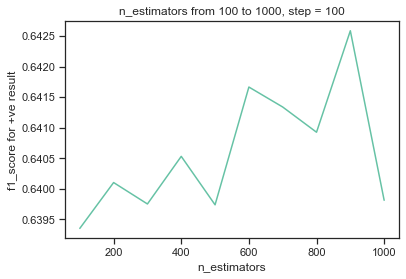

In [438]:
determine_n_estimators(start = 100, end = 1000, step = 100)

# Tuning Hyperparameters (I only kept the last turning and update the hyperparameter to the function above)

In [440]:
xgboost2 = XGBClassifier(random_state=300,
                         n_estimators=900,
                         max_depth = 3,
                         learning_rate=0.1, 
                         min_child_weight = 1, 
                         gamma = 0.2,
                         subsample = 0.8,
                         colsample_bytree= 0.8,
                         objective= 'binary:logistic',
                         scale_pos_weight = NegoverPos,
                         n_jobs=-1)

param2 = {'subsample':(0.6,0.7,0.8),
         'colsample_bytree':(0.6,0.7,0.8)}
gridsearch2 = GridSearchCV(estimator = xgboost2, param_grid=param2, cv = 3, scoring='f1')
gridsearch2.fit(x_train_s, y_train_s)
y_predicted1 = gridsearch2.predict(x_test_s)
print(classification_report(y_test_s, y_predicted1, target_names=['No', 'Yes']))

In [441]:
gridsearch2.best_params_

{'colsample_bytree': 0.6, 'subsample': 0.8}

In [442]:
gridsearch2.best_score_

0.62971961586139

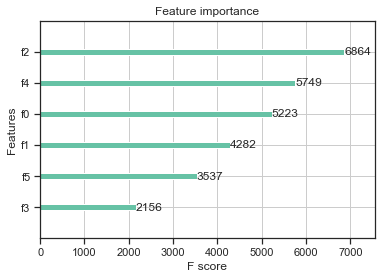

In [376]:
plot_importance(xgboost2)

# Second Trial

In [2]:
weather2 = pd.read_csv('weatherAUS.csv')

In [3]:
weather2.shape

(142193, 24)

In [4]:
weather2.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [5]:
weather2.drop(['RISK_MM', 'Date'],axis =1, inplace = True)

### Find Features with higher correlations

In [6]:
weather2['RainTomorrow'] = LabelBinarizer().fit_transform(weather2.RainTomorrow)
corr = weather2.corr(method = 'pearson')
corr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
MinTemp,1.000000,0.736267,0.104255,0.467261,0.072961,0.177285,0.176005,0.175749,-0.234211,0.005999,-0.451260,-0.461623,0.077625,0.020489,0.901813,0.708865,0.083936
MaxTemp,0.736267,1.000000,-0.074839,0.588915,0.469967,0.067690,0.014680,0.050800,-0.505432,-0.509270,-0.332293,-0.427279,-0.289865,-0.279053,0.887020,0.984562,-0.159237
Rainfall,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.133497,0.086816,0.057759,0.223725,0.255312,-0.168085,-0.126728,0.198195,0.171993,0.011477,-0.079178,0.239032
Evaporation,0.467261,0.588915,-0.064549,1.000000,0.366607,0.203001,0.193936,0.128895,-0.505890,-0.392785,-0.269907,-0.293160,-0.185032,-0.184287,0.545497,0.574275,-0.119285
Sunshine,0.072961,0.469967,-0.227525,0.366607,1.000000,-0.032831,0.008040,0.056012,-0.491603,-0.629122,0.040959,-0.020464,-0.675610,-0.704202,0.291139,0.490180,-0.450768
WindGustSpeed,0.177285,0.067690,0.133497,0.203001,-0.032831,1.000000,0.604837,0.686419,-0.215461,-0.026663,-0.457891,-0.412922,0.071235,0.109088,0.150258,0.032970,0.234010
WindSpeed9am,0.176005,0.014680,0.086816,0.193936,0.008040,0.604837,1.000000,0.519971,-0.270807,-0.031607,-0.227923,-0.174916,0.024280,0.053584,0.129298,0.005108,0.090995
WindSpeed3pm,0.175749,0.050800,0.057759,0.128895,0.056012,0.686419,0.519971,1.000000,-0.145942,0.015903,-0.295567,-0.254988,0.052780,0.025269,0.163601,0.028567,0.087817
Humidity9am,-0.234211,-0.505432,0.223725,-0.505890,-0.491603,-0.215461,-0.270807,-0.145942,1.000000,0.667388,0.139519,0.186955,0.452182,0.358043,-0.472826,-0.499777,0.257161
Humidity3pm,0.005999,-0.509270,0.255312,-0.392785,-0.629122,-0.026663,-0.031607,0.015903,0.667388,1.000000,-0.027449,0.051840,0.517037,0.523270,-0.221467,-0.557989,0.446160


In [7]:
new_weather = weather2.drop(['MinTemp', 'MaxTemp','Evaporation', 'WindSpeed9am', 'WindSpeed3pm', 'Temp9am', 'Temp3pm', 'Pressure3pm', 'WindGustSpeed'], axis =1)
# display(new_weather[(abs(corr['Sunshine']) >= 0.5) & (abs(corr['Sunshine']) < 1)])
display(new_weather.head())
corr
#combine sunshine + humidity9pm + humidity3pm + cloud9am + cloud3pm
#pressure9am + pressure 3pm
ls = corr.drop(['MinTemp', 'MaxTemp','Evaporation', 'WindSpeed9am', 'WindSpeed3pm', 'Temp9am', 'Temp3pm'], axis =1)

,Location,Rainfall,Sunshine,WindGustDir,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,Albury,0.6,NaN,W,W,WNW,71.0,22.0,1007.7,8.0,NaN,No,0
1,Albury,0.0,NaN,WNW,NNW,WSW,44.0,25.0,1010.6,NaN,NaN,No,0
2,Albury,0.0,NaN,WSW,W,WSW,38.0,30.0,1007.6,NaN,2.0,No,0
3,Albury,0.0,NaN,NE,SE,E,45.0,16.0,1017.6,NaN,NaN,No,0
4,Albury,1.0,NaN,W,ENE,NW,82.0,33.0,1010.8,7.0,8.0,No,0


In [8]:
weight = corr.loc['RainTomorrow',['Sunshine','Humidity9am','Humidity3pm','Cloud9am','Cloud3pm']].reset_index()
weight

,index,RainTomorrow
0,Sunshine,-0.450768
1,Humidity9am,0.257161
2,Humidity3pm,0.446160
3,Cloud9am,0.317380
4,Cloud3pm,0.381870


In [9]:
new_weather.head()

,Location,Rainfall,Sunshine,WindGustDir,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,Albury,0.6,NaN,W,W,WNW,71.0,22.0,1007.7,8.0,NaN,No,0
1,Albury,0.0,NaN,WNW,NNW,WSW,44.0,25.0,1010.6,NaN,NaN,No,0
2,Albury,0.0,NaN,WSW,W,WSW,38.0,30.0,1007.6,NaN,2.0,No,0
3,Albury,0.0,NaN,NE,SE,E,45.0,16.0,1017.6,NaN,NaN,No,0
4,Albury,1.0,NaN,W,ENE,NW,82.0,33.0,1010.8,7.0,8.0,No,0


In [10]:
minmax = MinMaxScaler(feature_range = (0,1))
columntransformer = ColumnTransformer(transformers = [('ordinal', OrdinalEncoder(),['Location', 'WindGustDir','WindDir9am',
                                                                                   'WindDir3pm', 'RainToday'])],remainder = 'passthrough', sparse_threshold = 0)
new_weather.dropna(inplace = True)


In [11]:
x_train_2nd, x_test_2nd, y_train_2nd, y_test_2nd = train_test_split(new_weather.iloc[:,:-1], new_weather.iloc[:,-1],
                                                                   test_size = 0.2, random_state = 222)

In [12]:
x_train_2nd.head()

,Location,Rainfall,Sunshine,WindGustDir,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday
68004,Melbourne,0.0,2.6,SW,ENE,SSW,69.0,74.0,1005.6,6.0,8.0,No
84711,Brisbane,6.6,10.8,ENE,E,ENE,66.0,58.0,1016.2,5.0,1.0,Yes
76778,Watsonia,0.0,13.6,SSW,W,WSW,68.0,48.0,1026.5,1.0,1.0,No
114061,PearceRAAF,0.0,8.4,ESE,S,SSW,83.0,49.0,1025.5,8.0,7.0,No
100802,Nuriootpa,1.6,5.3,SSE,ENE,ESE,70.0,47.0,1018.6,6.0,4.0,Yes


### Combine feartures with higher correlation

In [13]:
numerical_features = ['Rainfall', 'Sunshine','Humidity9am','Humidity3pm','Pressure9am', 'Cloud9am','Cloud3pm']
#minmax the numerical_features
minmax =  MinMaxScaler(feature_range=(0, 1))
x_train_2nd[numerical_features] = minmax.fit_transform(x_train_2nd[numerical_features])
x_test_2nd[numerical_features] = minmax.transform(x_test_2nd[numerical_features])
display(x_train_2nd.head())
x_train_2nd['Sunshine_Humidity_Cloudy'] = x_train_2nd['Sunshine'] * weight.iloc[0,1] + x_train_2nd['Humidity9am'] * weight.iloc[1,1] + x_train_2nd['Humidity3pm'] * weight.iloc[2,1] + x_train_2nd['Cloud9am'] * weight.iloc[3,1] + x_train_2nd['Cloud3pm'] * weight.iloc[4,1]
# x_train_2nd['Pressure9am3pm'] = x_train_2nd['Pressure9am'] * weight.iloc[5,1] + x_train_2nd['Pressure3pm'] * weight.iloc[6,1] 

x_test_2nd['Sunshine_Humidity_Cloudy'] = x_test_2nd['Sunshine'] * weight.iloc[0,1] + x_test_2nd['Humidity9am'] * weight.iloc[1,1] + x_test_2nd['Humidity3pm'] * weight.iloc[2,1] + x_test_2nd['Cloud9am'] * weight.iloc[3,1] + x_test_2nd['Cloud3pm'] * weight.iloc[4,1]
# x_test_2nd['Pressure9am3pm'] = x_test_2nd['Pressure9am'] * weight.iloc[5,1] + x_test_2nd['Pressure3pm'] * weight.iloc[6,1] 

x_train_2nd.drop(weight['index'].values, axis = 1, inplace = True)
x_test_2nd.drop(weight['index'].values, axis = 1, inplace = True)
display(x_train_2nd.head())


,Location,Rainfall,Sunshine,WindGustDir,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday
68004,Melbourne,0.000000,0.181818,SW,ENE,SSW,0.69,0.74,0.419032,0.750,0.888889,No
84711,Brisbane,0.017954,0.755245,ENE,E,ENE,0.66,0.58,0.595993,0.625,0.111111,Yes
76778,Watsonia,0.000000,0.951049,SSW,W,WSW,0.68,0.48,0.767947,0.125,0.111111,No
114061,PearceRAAF,0.000000,0.587413,ESE,S,SSW,0.83,0.49,0.751252,1.000,0.777778,No
100802,Nuriootpa,0.004353,0.370629,SSE,ENE,ESE,0.70,0.47,0.636060,0.750,0.444444,Yes


,Location,Rainfall,WindGustDir,WindDir9am,WindDir3pm,Pressure9am,RainToday,Sunshine_Humidity_Cloudy
68004,Melbourne,0.000000,SW,ENE,SSW,0.419032,No,1.003117
84711,Brisbane,0.017954,ENE,E,ENE,0.595993,Yes,0.328852
76778,Watsonia,0.000000,SSW,W,WSW,0.767947,No,0.042427
114061,PearceRAAF,0.000000,ESE,S,SSW,0.751252,No,0.781666
100802,Nuriootpa,0.004353,SSE,ENE,ESE,0.636060,Yes,0.630395


In [14]:
test = x_train_2nd.copy()
test['RainT'] = y_train_2nd
test.corr()

,Rainfall,Pressure9am,Sunshine_Humidity_Cloudy,RainT
Rainfall,1.000000,-0.174526,0.266374,0.237021
Pressure9am,-0.174526,1.000000,-0.112679,-0.261025
Sunshine_Humidity_Cloudy,0.266374,-0.112679,1.000000,0.481280
RainT,0.237021,-0.261025,0.481280,1.000000


In [15]:
# x_train_2nd['Sunshine_Humidity_Cloudy_WindGustSpeed'] = x_train_2nd['Sunshine_Humidity_Cloudy'] * 0.481937 + x_train_2nd['WindGustSpeed'] * 0.237568

# x_test_2nd['Sunshine_Humidity_Cloudy_WindGustSpeed'] =  x_test_2nd['Sunshine_Humidity_Cloudy'] * 0.481937 + x_test_2nd['WindGustSpeed'] * 0.237568

# x_train_2nd.drop(['WindGustSpeed','Sunshine_Humidity_Cloudy'], axis = 1, inplace = True)
# x_test_2nd.drop(['WindGustSpeed','Sunshine_Humidity_Cloudy'], axis = 1, inplace = True)
# x_train_2nd.head()

In [16]:
x_train_2nd = columntransformer.fit_transform(x_train_2nd)
x_test_2nd = columntransformer.fit_transform(x_test_2nd)
x_train_2nd, y_train_2nd = SMOTE(sampling_strategy='minority').fit_resample(x_train_2nd, y_train_2nd)

In [17]:
y_train_2nd.tolist().count(1)

36247

In [18]:
x_train_2nd.shape

(72494, 8)

In [19]:
xgboost_2nd = XGBClassifier(n_estimators=350, learning_rate=0.1, max_depth=5, random_state=222 )
xgboost_2nd.fit(x_train_2nd, y_train_2nd)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=350, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=222,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [20]:
predicted_y_2nd = xgboost_2nd.predict(x_test_2nd)
print(classification_report(y_test_2nd,predicted_y_2nd))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      9063
           1       0.62      0.64      0.63      2601

    accuracy                           0.83     11664
   macro avg       0.76      0.77      0.76     11664
weighted avg       0.84      0.83      0.83     11664



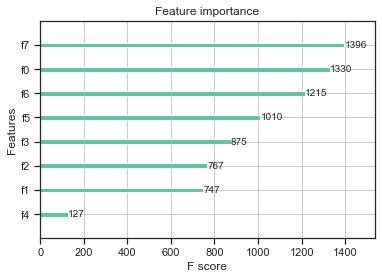

In [21]:
plot_importance(xgboost_2nd)

## Remove the least important feature

In [22]:
x_train_2nd = np.delete(x_train_2nd, 4, axis = 1)
x_test_2nd = np.delete(x_test_2nd, 4, axis = 1)

In [23]:
x_train_2nd.shape

(72494, 7)

In [68]:
xgboost_2nd = XGBClassifier(random_state=300,
                         n_estimators=100,
                         max_depth = 9,
                         learning_rate=0.1, 
                         min_child_weight = 2, 
                         gamma = 0.1,
                         reg_alpha= 0.01,
                         subsample = 0.9,
                         colsample_bytree= 0.85,
                         objective= 'binary:logistic',
                         n_jobs=-1)

In [70]:
param_2nd = {'n_estimators':np.arange(100,1000,100)}
gridsearch_2nd = GridSearchCV(estimator = xgboost_2nd, param_grid=param_2nd, cv = 3, scoring='f1')
gridsearch_2nd.fit(x_train_2nd, y_train_2nd)

predicted_y_2nd = gridsearch_2nd.predict(x_test_2nd)
print(classification_report(y_test_2nd, predicted_y_2nd))
# plot_importance(xgboost_2nd)




              precision    recall  f1-score   support

           0       0.90      0.86      0.88      9063
           1       0.59      0.67      0.62      2601

    accuracy                           0.82     11664
   macro avg       0.74      0.77      0.75     11664
weighted avg       0.83      0.82      0.82     11664



In [71]:
gridsearch_2nd.best_params_

{'n_estimators': 100}

In [72]:
gridsearch_2nd.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.85, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=2, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=300,
              reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)

### 1st tuning

In [36]:
param_2nd = { 'max_depth':(8,9,10), 'min_child_weight':(2,3,4)}
gridsearch_2nd = GridSearchCV(estimator = xgboost_2nd, param_grid=param_2nd, cv = 3, scoring='f1', verbose=2)
gridsearch_2nd.fit(x_train_2nd, y_train_2nd)

predicted_y_2nd = gridsearch_2nd.predict(x_test_2nd)
print(classification_report(y_test_2nd, predicted_y_2nd))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] max_depth=8, min_child_weight=2 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................. max_depth=8, min_child_weight=2, total=   6.5s
[CV] max_depth=8, min_child_weight=2 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s remaining:    0.0s


[CV] .................. max_depth=8, min_child_weight=2, total=   5.8s
[CV] max_depth=8, min_child_weight=2 .................................
[CV] .................. max_depth=8, min_child_weight=2, total=   5.8s
[CV] max_depth=8, min_child_weight=3 .................................
[CV] .................. max_depth=8, min_child_weight=3, total=   5.8s
[CV] max_depth=8, min_child_weight=3 .................................
[CV] .................. max_depth=8, min_child_weight=3, total=   5.5s
[CV] max_depth=8, min_child_weight=3 .................................
[CV] .................. max_depth=8, min_child_weight=3, total=   5.4s
[CV] max_depth=8, min_child_weight=4 .................................
[CV] .................. max_depth=8, min_child_weight=4, total=   5.3s
[CV] max_depth=8, min_child_weight=4 .................................
[CV] .................. max_depth=8, min_child_weight=4, total=   5.3s
[CV] max_depth=8, min_child_weight=4 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  2.9min finished


              precision    recall  f1-score   support

           0       0.90      0.86      0.88      9063
           1       0.59      0.67      0.62      2601

    accuracy                           0.82     11664
   macro avg       0.74      0.77      0.75     11664
weighted avg       0.83      0.82      0.82     11664



In [37]:
gridsearch_2nd.best_params_

{'max_depth': 9, 'min_child_weight': 2}

In [39]:
gridsearch_2nd.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=2, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=300,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

### 2rd Tuning

In [46]:
param_2nd = {'gamma':[0.05, 0.1, 0.15]}
gridsearch_2nd = GridSearchCV(estimator = xgboost_2nd, param_grid=param_2nd, cv = 3, scoring='f1', verbose=2)
gridsearch_2nd.fit(x_train_2nd, y_train_2nd)

predicted_y_2nd = gridsearch_2nd.predict(x_test_2nd)
print(classification_report(y_test_2nd, predicted_y_2nd))

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] gamma=0.05 ......................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................................... gamma=0.05, total=   6.6s
[CV] gamma=0.05 ......................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s remaining:    0.0s


[CV] ....................................... gamma=0.05, total=   6.9s
[CV] gamma=0.05 ......................................................
[CV] ....................................... gamma=0.05, total=   5.9s
[CV] gamma=0.1 .......................................................
[CV] ........................................ gamma=0.1, total=   6.0s
[CV] gamma=0.1 .......................................................
[CV] ........................................ gamma=0.1, total=   5.9s
[CV] gamma=0.1 .......................................................
[CV] ........................................ gamma=0.1, total=   5.9s
[CV] gamma=0.15 ......................................................
[CV] ....................................... gamma=0.15, total=   6.0s
[CV] gamma=0.15 ......................................................
[CV] ....................................... gamma=0.15, total=   6.2s
[CV] gamma=0.15 ......................................................
[CV] .

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   55.5s finished


              precision    recall  f1-score   support

           0       0.90      0.86      0.88      9063
           1       0.59      0.67      0.63      2601

    accuracy                           0.82     11664
   macro avg       0.74      0.77      0.75     11664
weighted avg       0.83      0.82      0.82     11664



In [47]:
gridsearch_2nd.best_params_

{'gamma': 0.1}

In [48]:
gridsearch_2nd.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=2, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=300,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

### 3nd Tuning

In [57]:
param_2nd = {  'subsample':[0.80,0.85, 0.9, 0.95],
 'colsample_bytree':[0.70, 0.75, 0.80, 0.85, 0.90]}
gridsearch_2nd = GridSearchCV(estimator = xgboost_2nd, param_grid=param_2nd, cv = 3, scoring='f1', verbose=2)
gridsearch_2nd.fit(x_train_2nd, y_train_2nd)

predicted_y_2nd = gridsearch_2nd.predict(x_test_2nd)
print(classification_report(y_test_2nd, predicted_y_2nd))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] colsample_bytree=0.7, subsample=0.8 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. colsample_bytree=0.7, subsample=0.8, total=   6.0s
[CV] colsample_bytree=0.7, subsample=0.8 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s


[CV] .............. colsample_bytree=0.7, subsample=0.8, total=   6.0s
[CV] colsample_bytree=0.7, subsample=0.8 .............................
[CV] .............. colsample_bytree=0.7, subsample=0.8, total=   5.8s
[CV] colsample_bytree=0.7, subsample=0.85 ............................
[CV] ............. colsample_bytree=0.7, subsample=0.85, total=   5.9s
[CV] colsample_bytree=0.7, subsample=0.85 ............................
[CV] ............. colsample_bytree=0.7, subsample=0.85, total=   5.7s
[CV] colsample_bytree=0.7, subsample=0.85 ............................
[CV] ............. colsample_bytree=0.7, subsample=0.85, total=   5.7s
[CV] colsample_bytree=0.7, subsample=0.9 .............................
[CV] .............. colsample_bytree=0.7, subsample=0.9, total=   5.9s
[CV] colsample_bytree=0.7, subsample=0.9 .............................
[CV] .............. colsample_bytree=0.7, subsample=0.9, total=   5.6s
[CV] colsample_bytree=0.7, subsample=0.9 .............................
[CV] .

[CV] ............. colsample_bytree=0.9, subsample=0.95, total=   7.1s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  6.4min finished


              precision    recall  f1-score   support

           0       0.90      0.87      0.88      9063
           1       0.59      0.67      0.63      2601

    accuracy                           0.82     11664
   macro avg       0.75      0.77      0.76     11664
weighted avg       0.83      0.82      0.83     11664



In [58]:
gridsearch_2nd.best_params_

{'colsample_bytree': 0.9, 'subsample': 0.85}

In [59]:
gridsearch_2nd.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=2, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=300,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.85, verbosity=1)

### 4th Tuning

In [61]:
param_2nd = { 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]}
gridsearch_2nd = GridSearchCV(estimator = xgboost_2nd, param_grid=param_2nd, cv = 3, scoring='f1', verbose=2)
gridsearch_2nd.fit(x_train_2nd, y_train_2nd)

predicted_y_2nd = gridsearch_2nd.predict(x_test_2nd)
print(classification_report(y_test_2nd, predicted_y_2nd))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] reg_alpha=0 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................................... reg_alpha=0, total=   6.2s
[CV] reg_alpha=0 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s remaining:    0.0s


[CV] ...................................... reg_alpha=0, total=   5.9s
[CV] reg_alpha=0 .....................................................
[CV] ...................................... reg_alpha=0, total=   5.9s
[CV] reg_alpha=0.001 .................................................
[CV] .................................. reg_alpha=0.001, total=   6.0s
[CV] reg_alpha=0.001 .................................................
[CV] .................................. reg_alpha=0.001, total=   5.9s
[CV] reg_alpha=0.001 .................................................
[CV] .................................. reg_alpha=0.001, total=   5.9s
[CV] reg_alpha=0.005 .................................................
[CV] .................................. reg_alpha=0.005, total=   6.0s
[CV] reg_alpha=0.005 .................................................
[CV] .................................. reg_alpha=0.005, total=   5.8s
[CV] reg_alpha=0.005 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.5min finished


              precision    recall  f1-score   support

           0       0.90      0.86      0.88      9063
           1       0.59      0.67      0.62      2601

    accuracy                           0.82     11664
   macro avg       0.74      0.77      0.75     11664
weighted avg       0.83      0.82      0.82     11664



In [63]:
print(gridsearch_2nd.best_params_)
gridsearch_2nd.best_score_

{'reg_alpha': 0.01}


0.8395412732325201

In [67]:
param_2nd = {'n_estimators':np.arange(100,1000,100)}
gridsearch_2nd = GridSearchCV(estimator = xgboost_2nd, param_grid=param_2nd, cv = 3, scoring='f1', verbose=2,n_jobs=-1)
gridsearch_2nd.fit(x_train_2nd, y_train_2nd)

predicted_y_2nd = gridsearch_2nd.predict(x_test_2nd)
print(classification_report(y_test_2nd, predicted_y_2nd))

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  7.2min finished


              precision    recall  f1-score   support

           0       0.90      0.86      0.88      9063
           1       0.59      0.67      0.62      2601

    accuracy                           0.82     11664
   macro avg       0.74      0.77      0.75     11664
weighted avg       0.83      0.82      0.82     11664



In [66]:
print(gridsearch_2nd.best_params_)
gridsearch_2nd.best_estimator_

{'n_estimators': 100}


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.85, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=2, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=300,
              reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)

In [73]:
xgboost_2nd = XGBClassifier(random_state=300,
                         n_estimators=100,
                         max_depth = 9,
                         learning_rate=0.1, 
                         min_child_weight = 2, 
                         gamma = 0.1,
                         reg_alpha= 0.01,
                         subsample = 0.9,
                         colsample_bytree= 0.85,
                         objective= 'binary:logistic',
                         n_jobs=-1)
xgboost_2nd.fit(x_train_2nd, y_train_2nd)

predicted_y_2nd = xgboost_2nd.predict(x_test_2nd)
print(classification_report(y_test_2nd, predicted_y_2nd))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      9063
           1       0.59      0.67      0.62      2601

    accuracy                           0.82     11664
   macro avg       0.74      0.77      0.75     11664
weighted avg       0.83      0.82      0.82     11664



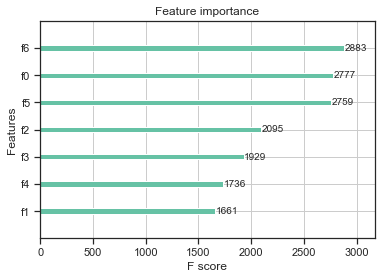

In [74]:
plot_importance(xgboost_2nd)

Further Study
- can investigate more about features which are highly correlated
- can try to use prediction models to predict the missing values
- can create new features based on domain knowledge

In [79]:
!ipython nbconvert --to=python Project_2_basic_ver.ipynb

[TerminalIPythonApp] WARNING | Subcommand `ipython nbconvert` is deprecated and will be removed in future versions.
[TerminalIPythonApp] WARNING | You likely want to use `jupyter nbconvert` in the future
[NbConvertApp] Converting notebook Project_2_basic_ver.ipynb to python
[NbConvertApp] Writing 22156 bytes to Project_2_basic_ver.py
